### Instructions
Find a data set that you are interested in over the internet. It can be of any field (sports, music, games, etc.).

Take note of where you got the data, the date you gathered it, and if there are other important notes regarding it. 

Using Jupyter, execute the following:

1. All values should be set to two decimal places only. 

2. Load the data set to your notebook. 

3. Determine the 'shape' of the data. 

4. Display the first five rows of each column. 

5. Display the current names of each column. 

6. Display the data types of each column. 

7. Display the non-null values of each column. 

8. Show the statistical description of each column. 

9. Change all the column names to the following naming convention (all small cases, no spaces in between, no symbols).

10. Show a data visualization navigation for each data set. 

 

Then using Python Jupyter Notebook, describe the data set in terms of: 

1. Statistical measurements of each of the features of the data. 

2. Create a graphic representation of three of the most interesting features and describe why is it significant for you.

3. Determine if the data has the potential for machine learning goals and what applications you think can use this data.

4. Discuss potential issues and anomalies seen in the data (missing data, outliers, etc.).

5. Why do you think knowing and exploring data is important before going through and applying machine learning algorithms? 

### Movie Lens Data Set

This data set contains a total of 100,000 ratings from 600 users on 9,000 movies. Each user has rated at least 20 movies.

For more details you can check the following link: [movie lens](https://grouplens.org/datasets/movielens/).

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Load the data set to your notebook

In [285]:
# 1. Load the dataset
df = pd.read_csv("./datasets/movie-lens/ratings.csv", sep=",")

movies_df = pd.read_csv("./datasets/movie-lens/movies.csv", sep=",")
ratings_df = pd.read_csv('./datasets/movie-lens/ratings.csv', sep=',')

In [286]:
# Only get the first 100 rows
ratings_df = ratings_df
movies_df = movies_df

#### 2. Determine the `shape` of the data.

In [287]:
df.shape

(100836, 4)

#### 3. Display the first five rows of each column.

In [288]:
df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### 4. Display the current names of each column

In [289]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

#### 5. Display the data types of each column

In [290]:
df.dtypes

userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object

#### 6. Display the non-null values of each column

In [291]:
df.notnull().sum()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

#### 7. Show the statistical description of each column

In [292]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#### 8. Change all the column names to the following naming convention (all small cases, no spaces in between, no symbols)

In [293]:
df.rename({"userId": "user_id", "movieId": "movie_id"}, axis=1, inplace=True)
df

,user_id,movie_id,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


#### 9. Show a data visualization navigation for each dataset


In [294]:
# Merge the movies and ratings dataframes
df = pd.merge(movies_df, ratings_df, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/921564488.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/921564488.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('title').mean()['rating'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))


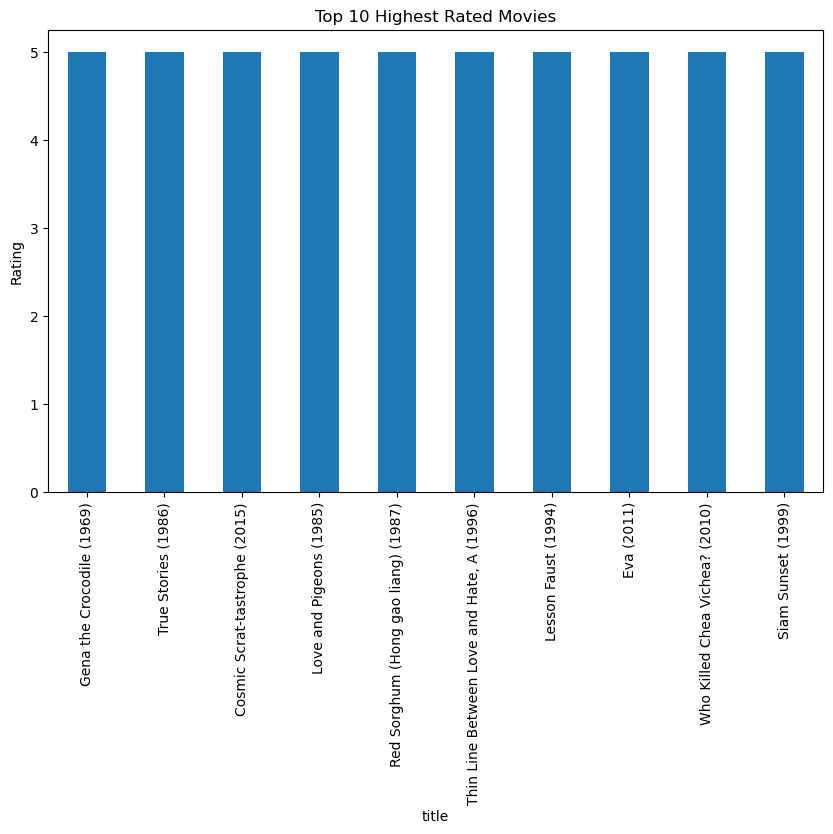

In [295]:
# Group the visualizations 

# Visualize the ratings based on the genre of the movie using a bar plot
df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Genre')
plt.ylabel('Rating')
plt.show

# Visualize the highest rated movies using a bar plot
df.groupby('title').mean()['rating'].sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Highest Rated Movies')
plt.ylabel('Rating')
plt.show()

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/4063688244.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))


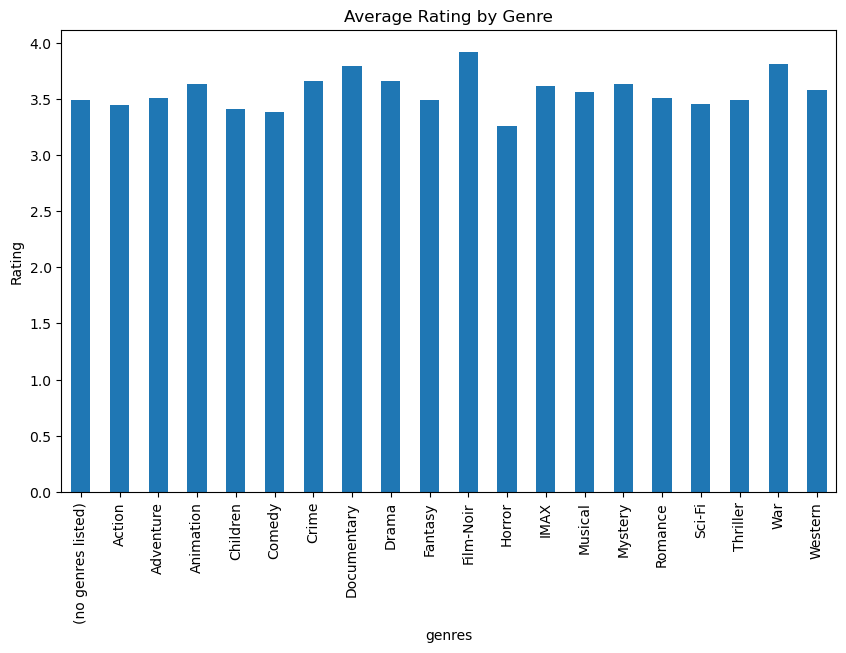

In [296]:
# Seperate the genres into columns and visualize the ratings based on the genre of the movie using a bar plot
df['genres'] = df['genres'].str.split('|')
df = df.explode('genres')
df.groupby('genres').mean()['rating'].plot(kind='bar', figsize=(10, 6))
plt.title('Average Rating by Genre')
plt.ylabel('Rating')
plt.show()

In [297]:
# Convert the timestamp to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
# Add a column for the year
df['timestamp_year'] = df['timestamp'].dt.year.astype("Int64")

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/2058941997.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)
/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/2058941997.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)
/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/2058941997.py:11: FutureWarning: The default value of numeric_onl

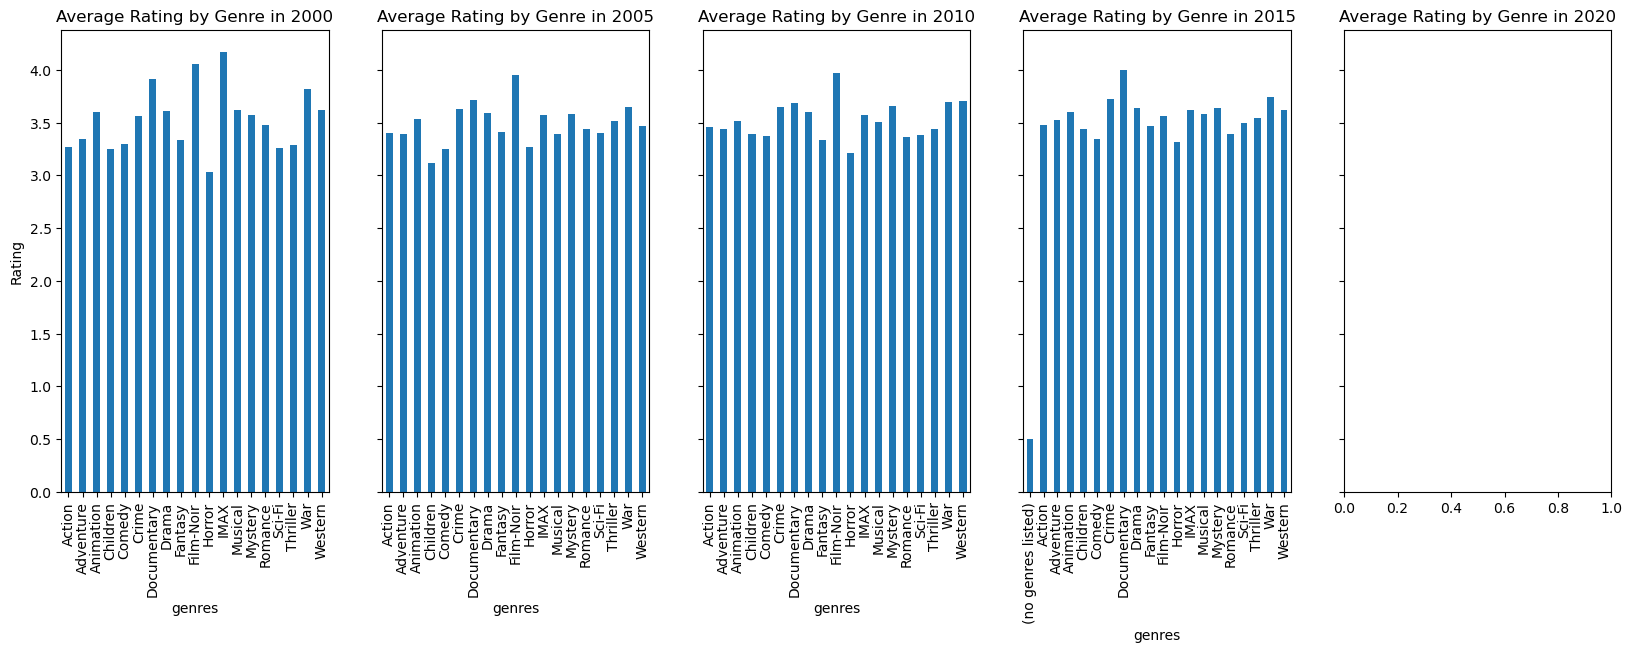

In [298]:
# Visualize a list of the average ratings by genre for each year using a grouped subplots
years_to_check = [2000, 2005, 2010, 2015, 2020]


fig, axes = plt.subplots(1, len(years_to_check), figsize=(20, 6), sharey=True)
for i, year_to_check in enumerate(years_to_check):
    axes[i].set_title(f'Average Rating by Genre in {year_to_check}'.format(year_to_check))
    axes[i].set_ylabel('Rating')
    # Check if the years is in the dataset
    if year_to_check in df['timestamp_year'].unique():
        df[df['timestamp_year'] == year_to_check].groupby('genres').mean()['rating'].plot(kind='bar', ax=axes[i], rot=0)
        # Rotate the xticks
        axes[i].tick_params(axis='x', rotation=90)
        continue
plt.show()

#### 1. Statistical measurements of each of the features of the data
1. `movies.csv` - Contains the following measurements:
   1. `movieId`: This will be used to identify the movie
   2. `title`: This will be used to identify the title of the movie
   3. `genres`: A list of genres that the movie belongs to
2. `ratings.csv` - Contains the following measurements:
   1. `userId`: This will be used to identify the user
   2. `movieId`: This will be used to identify the movie
   3. `ratings`: This will be used to identify the rating of each user for each movie
   4. `timestamp`: This will be used to identify the timestamp of each rating which can be used to identify the date and time of each rating

#### 2. Create a graphic representation of three of the most interesting features and describe why is it significant for you.

/var/folders/pq/_2xfzl710x79r25081t4ksvw0000gn/T/ipykernel_42858/3910939546.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['timestamp_year', 'genres']).mean()['rating'].unstack().plot(kind='bar', figsize=(20, 6))


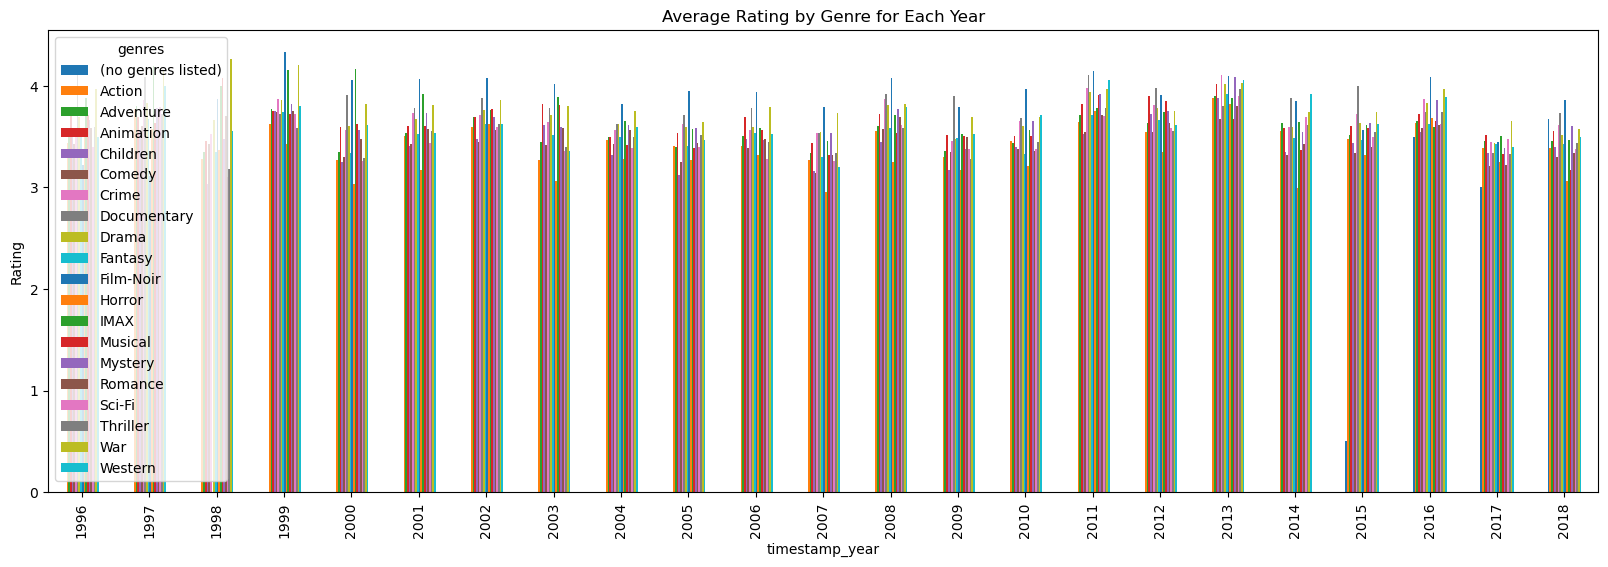

In [299]:
# Visualize the average rating by genre for each year using a line plot
df.groupby(['timestamp_year', 'genres']).mean()['rating'].unstack().plot(kind='bar', figsize=(20, 6))
plt.title('Average Rating by Genre for Each Year')
plt.ylabel('Rating')
plt.show()

#### 2.1 Based on the following graphic representations, I can say that the following are the most interesting features:

1. `userId`: This will be used to identify the user 
2. `movieId`: This will be used to identify the movie
3. `ratings`: This will be used to identify the rating of each user for each movie as this will be used to identify which movies are the most popular for each year

#### 3. Determine if the data has the potential for machine learning goals and what applications you think can use this data.
The data has the potential for machine learning goals as it can be used to predict the ratings of each user for each movie based on the ratings of other users for each movie. Along with this, it can be used to generate recommendations users based on the ratings of other users for each movie.

#### 4. Discuss potential issues and anomalies seen in the data (missing data, outliers, etc.).
Upon inspecting the data, I have noticed that the data has already been sanitized and there are no missing data or outliers.

#### 5. Why do you think knowing and exploring data is important before going through and applying machine learning algorithms? 

Knowing and exploring data is important before going through and applying machine learning algorithms as it can help us determine the following:
  1. The data that we are working with
  2. The data that we need to work with
  3. The data that we need to remove
  4. The data that we need to sanitize
  5. The data that we need to transform
  6. The data that we need to analyze
  7. The data that we need to visualize
  8. The data that we need to model
  9. The data that we need to evaluate
 10. The data that we need to deploy

Which are all important in order to achieve the desired results.   